In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

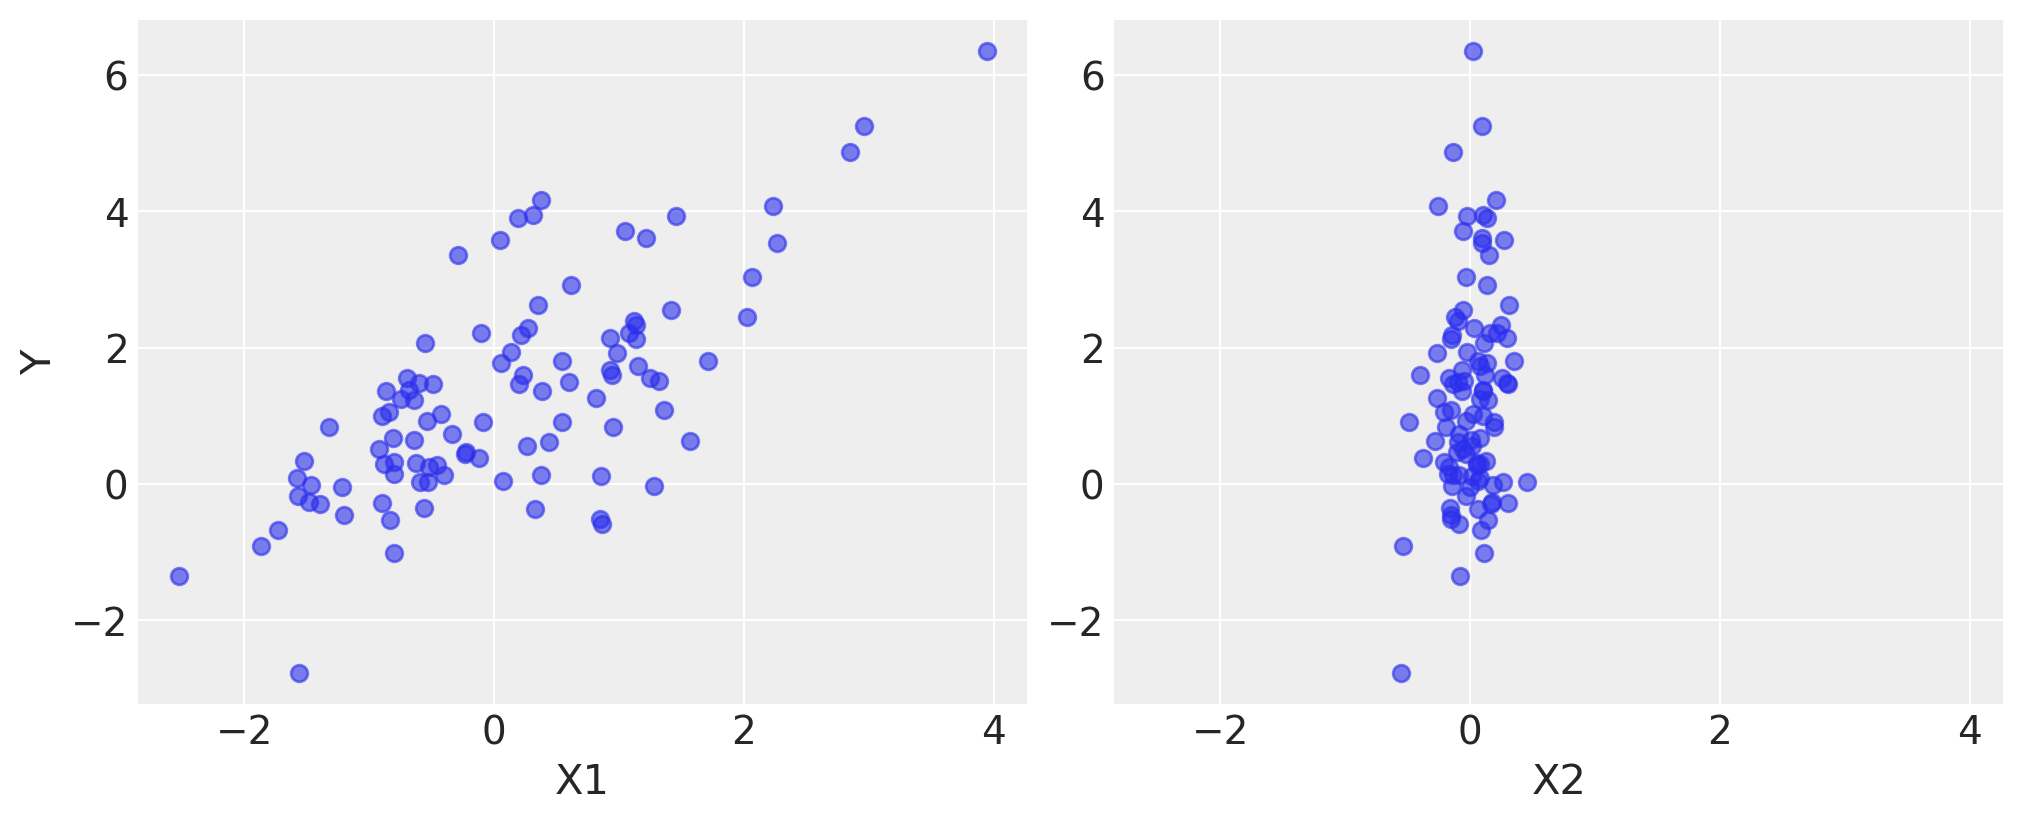

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [5]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.1.2


In [6]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [7]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [8]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [9]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.15017474, 1.19819724, 1.16259935, 1.21046598, 1.11002751],
       [1.09523084, 1.20463777, 1.12000061, 1.19703989, 1.19703989],
       [1.06887679, 1.17766058, 1.0785284 , 1.23247566, 1.04862151],
       [1.19704939, 1.15836848, 1.18533275, 1.14998474, 1.00869745]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4

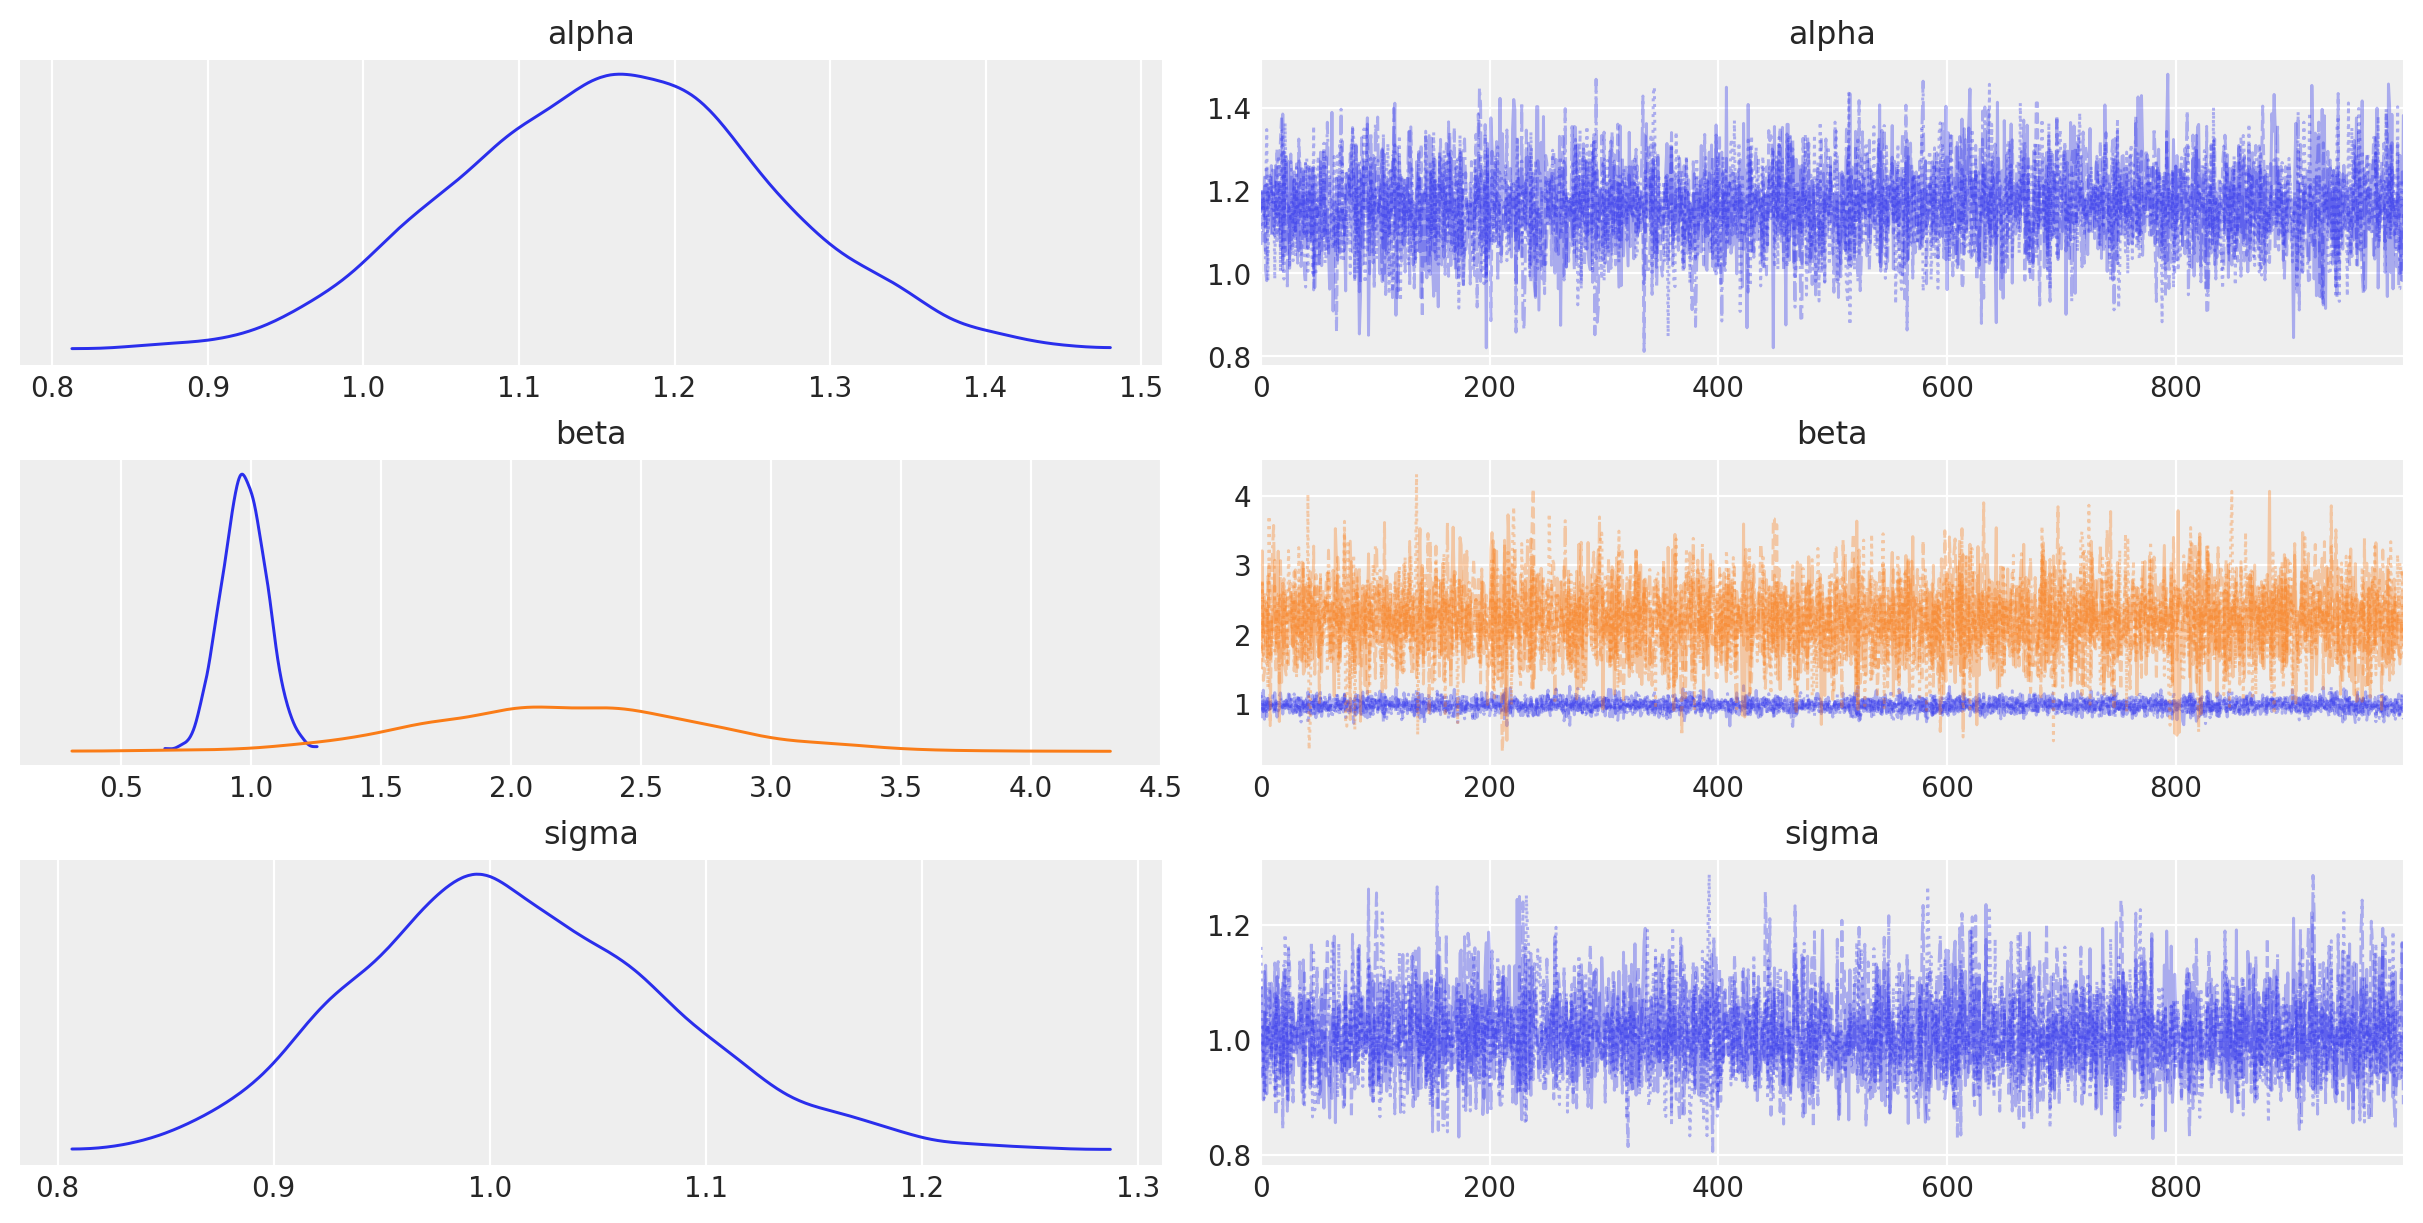

In [10]:
az.plot_trace(idata, combined=True);

In [11]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.16,0.10,0.98,1.36,0.00,0.00,6053.25,2812.65,1.0
beta[0],0.97,0.09,0.81,1.14,0.00,0.00,6157.16,2906.23,1.0
beta[1],2.20,0.54,1.20,3.22,0.01,0.01,5623.79,3011.88,1.0
sigma,1.01,0.07,0.87,1.15,0.00,0.00,5989.25,3223.04,1.0


In [13]:
idata.posterior["alpha"]

<xarray.DataArray 'alpha' (chain: 4, draw: 1000)>
array([[1.15017474, 1.19819724, 1.16259935, ..., 1.00159297, 1.00159297,
        1.38145467],
       [1.09523084, 1.20463777, 1.12000061, ..., 1.16286024, 1.21903953,
        1.16890285],
       [1.06887679, 1.17766058, 1.0785284 , ..., 1.11088554, 0.98286004,
        1.14315737],
       [1.19704939, 1.15836848, 1.18533275, ..., 1.0413333 , 1.24492137,
        1.24516991]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [14]:
pm.model_to_graphviz(idata)

AttributeError: 'InferenceData' object has no attribute 'named_vars'